In [8]:
import leafmap
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from samgeo import split_raster
from samgeo.text_sam import LangSAM
from utils import plot_overlay

In [19]:
TRAIN_PATH = '../data/potsdam/Potsdam/Train'
PREDICTED_PATH = '../data/potsdam/Potsdam/Predicted'

train_ids = next(os.walk(TRAIN_PATH))[1]
print (train_ids)

['t3_13_5_12', 't5_15_5_13', 't4_15_1_6', 't4_10_2_11', 't2_10_7_5', 't2_13_7_13', 't6_11_0_10', 't4_10_7_4', 't5_14_0_12', 't3_10_11_1', 't4_13_8_12', 't6_15_6_5', 't7_7_9_10', 't3_13_14_6', 't6_8_13_3', 't3_10_5_14', 't4_11_0_10', 't3_14_14_0', 't7_12_10_7', 't4_11_6_11', 't2_12_3_11', 't4_13_10_9', 't2_13_14_1', 't6_10_11_12', 't2_12_6_1', 't7_13_10_11', 't4_13_10_4', 't6_15_0_7', 't7_11_12_13', 't7_13_11_11', 't6_15_14_7', 't3_10_11_12', 't2_13_1_11', 't4_13_10_12', 't4_10_8_2', 't7_9_9_6', 't7_12_1_1', 't5_12_10_10', 't6_12_2_6', 't2_10_0_10', 't6_8_5_2', 't3_12_5_14', 't6_10_13_2', 't6_12_10_6', 't6_8_14_6', 't6_7_10_10', 't4_11_6_4', 't3_14_2_0', 't5_15_4_3', 't3_12_6_9', 't3_13_6_6', 't7_7_6_10', 't7_9_13_12', 't4_15_13_2', 't3_10_11_2', 't5_15_9_8', 't2_14_11_8', 't6_7_2_5', 't2_10_4_0', 't7_10_5_9', 't4_14_14_14', 't4_12_13_7', 't5_14_6_12', 't4_15_0_10', 't3_12_6_5', 't5_10_8_5', 't2_13_9_9', 't5_13_0_11', 't2_11_3_14', 't5_11_3_11', 't3_13_12_8', 't4_10_9_1', 't5_12_4_0', '

In [10]:
%env CUDA_VISIBLE_DEVICES="" # to run on CPU

env: CUDA_VISIBLE_DEVICES="" # to run on CPU


In [11]:
SAM_CHECKPOINT = "../segment-anything/checkpoints/sam_vit_l_0b3195.pth"
MODEL_TYPE = "vit_l"
sam = LangSAM(model_type=MODEL_TYPE, checkpoint=SAM_CHECKPOINT)

final text_encoder_type: bert-base-uncased


In [18]:
# only train_ids first 10
# train_ids = train_ids[:10]

# create prediction directory
if not os.path.exists(PREDICTED_PATH):
    os.makedirs(PREDICTED_PATH)


for id in train_ids[10:]:
    # Construct paths for image and mask
    file_prefix = 'top_potsdam_' + id.replace("t","")
    # Construct paths for image and mask
    img_path = os.path.join(TRAIN_PATH, id, file_prefix + '_RGB.tif')
    
    text_prompt = "tree, gras"
    mask_path = os.path.join(PREDICTED_PATH, file_prefix + '_predicted.tif')
    box_threshold = 0.25
    text_threshold = 0.5
    sam.predict(img_path, text_prompt, 
                box_threshold=box_threshold, 
                text_threshold=text_threshold, 
                output=mask_path
                )
    



No objects found in the image.
No objects found in the image.
No objects found in the image.
No objects found in the image.
No objects found in the image.
No objects found in the image.
No objects found in the image.
No objects found in the image.
No objects found in the image.


KeyboardInterrupt: 

../data/potsdam/Potsdam/Train/t3_13_5_12/top_potsdam_3_13_5_12_RGB.tif ../data/potsdam/Potsdam/Train/t3_13_5_12/top_potsdam_3_13_5_12_label.tif ../data/potsdam/Potsdam/Predicted/top_potsdam_3_13_5_12_predicted.tif


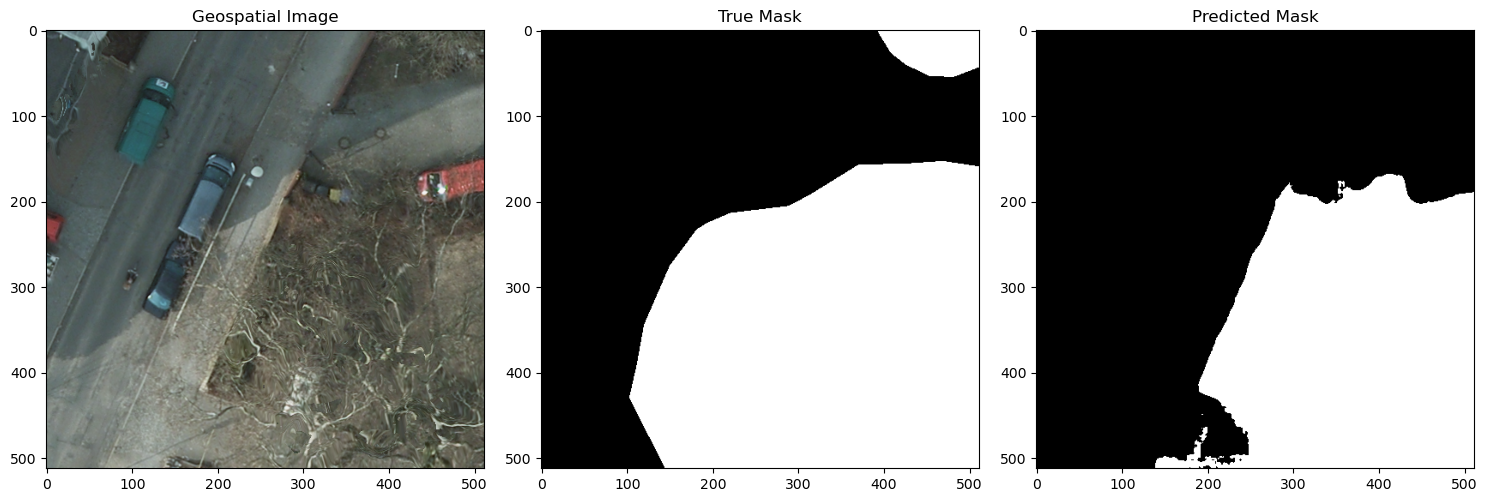

In [28]:
id = train_ids[0]
file_prefix = 'top_potsdam_' + id.replace("t","")
img_path = os.path.join(TRAIN_PATH, id, file_prefix + '_RGB.tif')
mask_path = os.path.join(TRAIN_PATH, id, file_prefix + '_label.tif')
predicted_path = os.path.join(PREDICTED_PATH, file_prefix + '_predicted.tif')
print(img_path, mask_path, predicted_path)

# plot 3 images first actual then label and predicted
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path)
predicted = cv2.imread(predicted_path)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Geospatial Image')
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title('True Mask')
plt.subplot(1, 3, 3)
plt.imshow(predicted)
plt.title('Predicted Mask')

plt.tight_layout()
plt.show()

In [22]:
import sys
sys.path.append('../mask-evaluation')
from main import evaluate_mask_file, print_metrics, evaluate_mask
from collections import Counter

In [49]:

data = []

for id in train_ids[:15]:
    # Construct paths for image and mask
    file_prefix = 'top_potsdam_' + id.replace("t","")
    
    text_prompt = "tree, gras"
    mask_path = os.path.join(TRAIN_PATH, id, file_prefix + '_label.tif')
    predicted_path = os.path.join(PREDICTED_PATH, file_prefix + '_predicted.tif')
    data.append((predicted_path, mask_path))
    

def evaluate_mask_file(base_mask_path: str, predicted_mask_path: str) -> Counter:
    expected = cv2.imread(base_mask_path)
    actual = cv2.imread(predicted_mask_path)
    return evaluate_mask(expected, actual)


res = sum([evaluate_mask_file(base, actual) for base, actual in data], Counter())

print_metrics(res)


Results: 
   accuracy: 72.899 %
         f1:  0.484
     recall:  0.385 (or sensitivity)
  precision:  0.649
specificity:  0.898

TPR: 0.385 | FNR: 0.615
TNR: 0.898 | FPR: 0.102
PPV: 0.649 | FDR: 0.351
NPV: 0.748 | FOR: 0.252
